In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as SNS
%matplotlib inline

In [195]:
DG = pd.read_csv(r'C:\Users\aalok\Downloads\Dollar_General_USA.csv.zip')

In [196]:
DG.head()

,Store No.,Name,Latitude,Longitude,Address,Street,City,State,Zip_Code,County,Phone,URL,Provider,Banner,Updated Date,Country,Status,Direction URL,Stock Ticker
0,4405,Dollar General # 4405,30.193502,-93.218094,"3521 Ryan St, Lake Charles, LA, 70605",3521 Ryan St,Lake Charles,LA,70605,Calcasieu Parish,337-377-0289,https://www.dollargeneral.com/,Dollar General,Dollar General,2022-01-03,USA,Open,https://www.google.com/maps/dir/Current+Locati...,DG:NYSE
1,20909,Dollar General # 20909,31.526540,-92.407550,"7933 Ridge St, Pollock, LA, 71467",7933 Ridge St,Pollock,LA,71467,Grant Parish,318-545-4780,https://www.dollargeneral.com/,Dollar General,Dollar General,2022-01-03,USA,Open,https://www.google.com/maps/dir/Current+Locati...,DG:NYSE
2,11950,Dollar General # 11950,34.919377,-83.386249,"7 Page St, Clayton, GA, 30525",7 Page St,Clayton,GA,30525,Rabun,470-508-9149,https://www.dollargeneral.com/,Dollar General,Dollar General,2022-01-03,USA,Open,https://www.google.com/maps/dir/Current+Locati...,DG:NYSE
3,6115,Dollar General # 6115,33.496183,-82.137341,"210 S Belair Rd, Augusta, GA, 30907",210 S Belair Rd,Augusta,GA,30907,Columbia,706-619-1530,https://www.dollargeneral.com/,Dollar General,Dollar General,2022-01-03,USA,Open,https://www.google.com/maps/dir/Current+Locati...,DG:NYSE
4,10145,Dollar General # 10145,33.717249,-84.147343,"6633 Covington Hwy, Lithonia, GA, 30058",6633 Covington Hwy,Lithonia,GA,30058,DeKalb,470-508-8261,https://www.dollargeneral.com/,Dollar General,Dollar General,2022-01-03,USA,Open,https://www.google.com/maps/dir/Current+Locati...,DG:NYSE


In [197]:
DG.shape

(17989, 19)

In [198]:
DG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17989 entries, 0 to 17988
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      17989 non-null  int64  
 1   Name           17989 non-null  object 
 2   Latitude       17989 non-null  float64
 3   Longitude      17989 non-null  float64
 4   Address        17989 non-null  object 
 5   Street         17989 non-null  object 
 6   City           17989 non-null  object 
 7   State          17989 non-null  object 
 8   Zip_Code       17989 non-null  int64  
 9   County         17989 non-null  object 
 10  Phone          17989 non-null  object 
 11  URL            17989 non-null  object 
 12  Provider       17989 non-null  object 
 13  Banner         17942 non-null  object 
 14  Updated Date   17989 non-null  object 
 15  Country        17989 non-null  object 
 16  Status         17989 non-null  object 
 17  Direction URL  17989 non-null  object 
 18  Stock 

In [199]:
DG.Banner.isna().sum()

47

In [200]:
DG.Provider.isna().sum()

0

In [201]:
DG['Provider'].value_counts()

Dollar General    17989
Name: Provider, dtype: int64

In [202]:
DG.shape

(17989, 19)

In [203]:
DG['Status'].value_counts()

Open    17989
Name: Status, dtype: int64

In [204]:
DG['Stock Ticker'].value_counts()

DG:NYSE    17989
Name: Stock Ticker, dtype: int64

In [205]:
DG['URL'].value_counts()

https://www.dollargeneral.com/    17989
Name: URL, dtype: int64

In [206]:
DG['Updated Date'].value_counts()

2022-01-03    17989
Name: Updated Date, dtype: int64

In [207]:
DG['Country'].value_counts()

USA    17989
Name: Country, dtype: int64

Several columns stand out as possible eliminations that are probably not helpful for this project. Many of these non helpful columns simply have only 1 value for all stores (rows). These columns include... "Banner", "Provider", "Stock Ticker", "URL", "Updated Date" and "Status"

"Country" is another column with just one value for all rows, however, because this is part of the address we will keep it in the dataframe for now

In [208]:
DG.shape

(17989, 19)

In [209]:
DG.drop(['Banner',  "Provider", "Stock Ticker", "URL", "Updated Date", "Status"],  axis=1, inplace=True)

The six columns mentioned above have been dropped.

In [210]:
DG.shape

(17989, 13)

In [211]:
DG['State'].value_counts()

TX    1688
GA     993
FL     980
NC     951
OH     938
TN     879
AL     860
PA     860
KY     649
MI     638
IN     636
IL     632
LA     623
SC     606
MO     598
MS     581
NY     550
OK     501
AR     497
VA     455
IA     295
WV     268
KS     259
CA     242
WI     233
MN     191
NJ     174
MD     155
NE     137
AZ     129
NM     111
CT      76
OR      73
SD      70
CO      66
ME      63
ND      59
MA      55
DE      50
NH      43
VT      39
WA      24
RI      21
NV      21
UT      11
WY       9
Name: State, dtype: int64

In [212]:
DG['Zip_Code'].value_counts()

38401    11
29526    11
29150    10
70726    10
30721    10
         ..
71259     1
61012     1
54867     1
44620     1
88061     1
Name: Zip_Code, Length: 11763, dtype: int64

<AxesSubplot:title={'center':' DG Store Count by State'}, xlabel='State', ylabel='Number of Stores'>

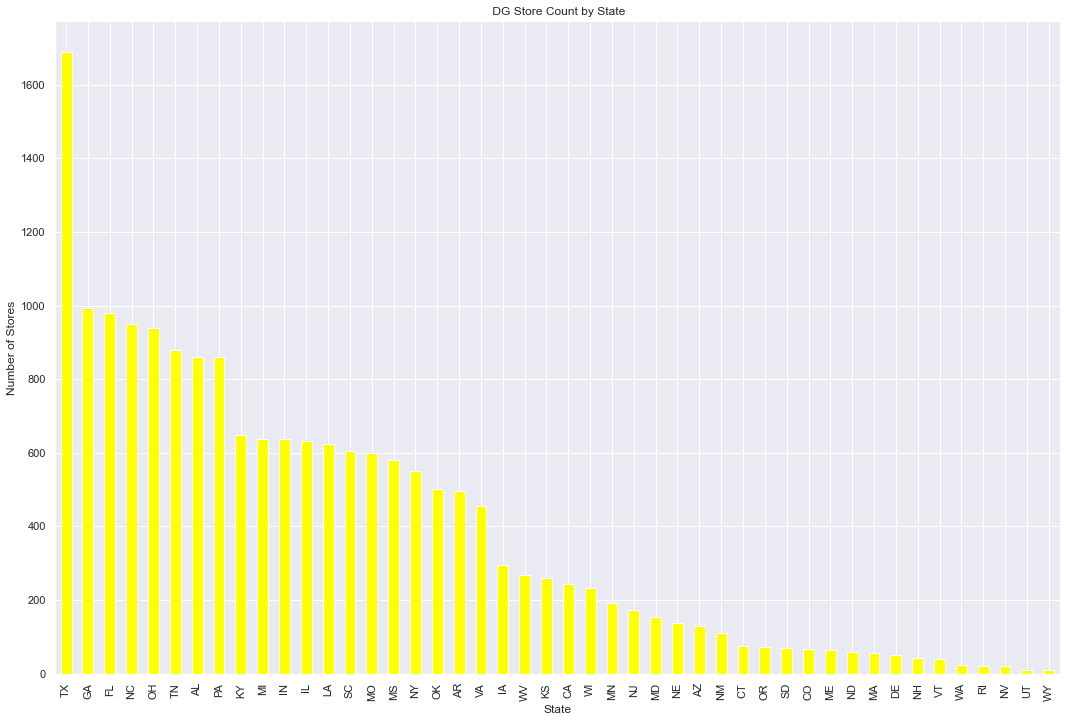

In [213]:
plt.figure(figsize=(18,12))
plt.xlabel("State")
plt.ylabel("Number of Stores")
plt.title(" DG Store Count by State")

DG['State'].value_counts().plot(kind='bar', color='yellow')

This bar chart above shows some interesting initial trends. Firstly, Texas is in a tier of its own when it comes to having Dollar General stores. Additionally, out of the top ten states with the most DG stores seven of them are in the South. Another trend that stands out is that DG is extremely prevelant in the South and the Midwest and comparatively has a small presence in either the Northeast or the West Coast. In fact, the Northeast or West Coast state with the most Dollar Generals, New York, is a paltry seventeenth on the list. This already suggests that Dollar General has specifically focused on the South and the Midwest in their expansion strategy.

Another way to quantify their supposed lopsided expansion strategy would be to plot DG stores per resident in the state. This would be done by applying state population to each store.

In [214]:
#Add a Stores in State column to give the total number of stores in the state
z = DG['State'].value_counts() 

z1 = z.to_dict() #converts to dictionary

DG['Stores in State'] = DG['State'].map(z1) 

In [215]:
DG.head()

,Store No.,Name,Latitude,Longitude,Address,Street,City,State,Zip_Code,County,Phone,Country,Direction URL,Stores in State
0,4405,Dollar General # 4405,30.193502,-93.218094,"3521 Ryan St, Lake Charles, LA, 70605",3521 Ryan St,Lake Charles,LA,70605,Calcasieu Parish,337-377-0289,USA,https://www.google.com/maps/dir/Current+Locati...,623
1,20909,Dollar General # 20909,31.526540,-92.407550,"7933 Ridge St, Pollock, LA, 71467",7933 Ridge St,Pollock,LA,71467,Grant Parish,318-545-4780,USA,https://www.google.com/maps/dir/Current+Locati...,623
2,11950,Dollar General # 11950,34.919377,-83.386249,"7 Page St, Clayton, GA, 30525",7 Page St,Clayton,GA,30525,Rabun,470-508-9149,USA,https://www.google.com/maps/dir/Current+Locati...,993
3,6115,Dollar General # 6115,33.496183,-82.137341,"210 S Belair Rd, Augusta, GA, 30907",210 S Belair Rd,Augusta,GA,30907,Columbia,706-619-1530,USA,https://www.google.com/maps/dir/Current+Locati...,993
4,10145,Dollar General # 10145,33.717249,-84.147343,"6633 Covington Hwy, Lithonia, GA, 30058",6633 Covington Hwy,Lithonia,GA,30058,DeKalb,470-508-8261,USA,https://www.google.com/maps/dir/Current+Locati...,993


In [216]:
#Create a Population in State Column 
DG['Population in State'] = DG['State'].map({'CA': 39613493, "TX" : 29730311, "FL" : 21944577, "NY" : 19299981, "PA" : 12804123, "IL" : 12569321, "OH" : 11714618, "GA" : 10830007, "NC": 10701022, "MI": 9992427,    
'NJ': 8874520, "VA" : 8603985, "WA" : 7796941, "AZ" : 7520103, "TN" : 6944260, "MA" : 6912239, "IN" : 6805663, "MO" : 6169038, "MD" : 6065436, "CO" : 5893634,    
'WI': 5852490, 'MN' : 5706398, 'SC': 5277830, 'AL': 4934193, 'LA' : 4627002, "KY": 4480713, 'OR': 4289439, 'OK':3990443, 'CT': 3552821, 'UT':3310774,    
'PR': 3194374, 'NV': 3185786, 'IA': 3167974, 'AR': 3033946, 'MS': 2966407, 'KS': 2917224, 'NM': 2105005, 'NE': 1951996, 'ID': 1860123, 'WV': 1767859,   
'HI': 1406430, 'NH': 1372203, 'ME': 1354522, 'MT': 1085004, 'RI': 1061509, 'DE': 990334, 'SD': 896581, 'ND': 770026, 'AK': 724357, 'DC': 714153, 'VT': 623251, 'WY': 581075})

The above population stats were sourced from worldpopulationreview.com - a website which tracks national and subnational populations worldwide. 

In [217]:
DG['Population in State'].value_counts().sum()

17989

All stores now have the amount of stores in their state and the population of their state - now we can calculate people per store or stores per people. For the people for store metric the lower the number the more stores they have to service the population. On the other hand, for the stores per person the higher the number the more stores they have to service the population. 

In [218]:
DG['Stores per Person'] = DG['Stores in State'] / DG['Population in State']
DG['People per Store'] = DG['Population in State'] / DG['Stores in State']

In [219]:
DG.head()

,Store No.,Name,Latitude,Longitude,Address,Street,City,State,Zip_Code,County,Phone,Country,Direction URL,Stores in State,Population in State,Stores per Person,People per Store
0,4405,Dollar General # 4405,30.193502,-93.218094,"3521 Ryan St, Lake Charles, LA, 70605",3521 Ryan St,Lake Charles,LA,70605,Calcasieu Parish,337-377-0289,USA,https://www.google.com/maps/dir/Current+Locati...,623,4627002,0.000135,7426.969502
1,20909,Dollar General # 20909,31.526540,-92.407550,"7933 Ridge St, Pollock, LA, 71467",7933 Ridge St,Pollock,LA,71467,Grant Parish,318-545-4780,USA,https://www.google.com/maps/dir/Current+Locati...,623,4627002,0.000135,7426.969502
2,11950,Dollar General # 11950,34.919377,-83.386249,"7 Page St, Clayton, GA, 30525",7 Page St,Clayton,GA,30525,Rabun,470-508-9149,USA,https://www.google.com/maps/dir/Current+Locati...,993,10830007,0.000092,10906.351460
3,6115,Dollar General # 6115,33.496183,-82.137341,"210 S Belair Rd, Augusta, GA, 30907",210 S Belair Rd,Augusta,GA,30907,Columbia,706-619-1530,USA,https://www.google.com/maps/dir/Current+Locati...,993,10830007,0.000092,10906.351460
4,10145,Dollar General # 10145,33.717249,-84.147343,"6633 Covington Hwy, Lithonia, GA, 30058",6633 Covington Hwy,Lithonia,GA,30058,DeKalb,470-508-8261,USA,https://www.google.com/maps/dir/Current+Locati...,993,10830007,0.000092,10906.351460


In [220]:
DG['People per Store'].value_counts()

17612.743483     1688
10906.351460      993
22392.425510      980
11252.389064      951
12488.931770      938
7900.182025       879
5737.433721       860
14888.515116      860
6904.026194       649
15662.111285      638
10700.727987      636
19888.166139      632
7426.969502       623
8709.290429       606
10316.117057      598
5105.691910       581
35090.874545      550
7964.956088       501
6104.519115       497
18909.857143      455
10738.894915      295
6596.488806       268
11263.413127      259
163692.119835     242
25117.982833      233
29876.429319      191
51002.988506      174
39131.845161      155
14248.145985      137
58295.372093      129
18964.009009      111
46747.644737       76
58759.438356       73
12808.300000       70
89297.484848       66
21500.349206       63
13051.288136       59
125677.072727      55
19806.680000       50
31911.697674       43
15980.794872       39
324872.541667      24
151704.095238      21
50548.047619       21
300979.454545      11
64563.8888

In [221]:
DG2 = DG.filter(['State', 'People per Store'], axis=1)

In [222]:
DG2.drop_duplicates(inplace=True)

In [223]:
#shape should be 46 x 2 as DG is only in 46 states and not in DC or PR
DG2.shape

(46, 2)

In [224]:
DG2.head(46)

,State,People per Store
0,LA,7426.969502
2,GA,10906.351460
7,IL,19888.166139
27,IN,10700.727987
41,MS,5105.691910
47,NC,11252.389064
71,MO,10316.117057
72,FL,22392.425510
76,KY,6904.026194
78,SD,12808.300000


In [225]:
DG2.sort_values(by=['People per Store'], inplace=True)

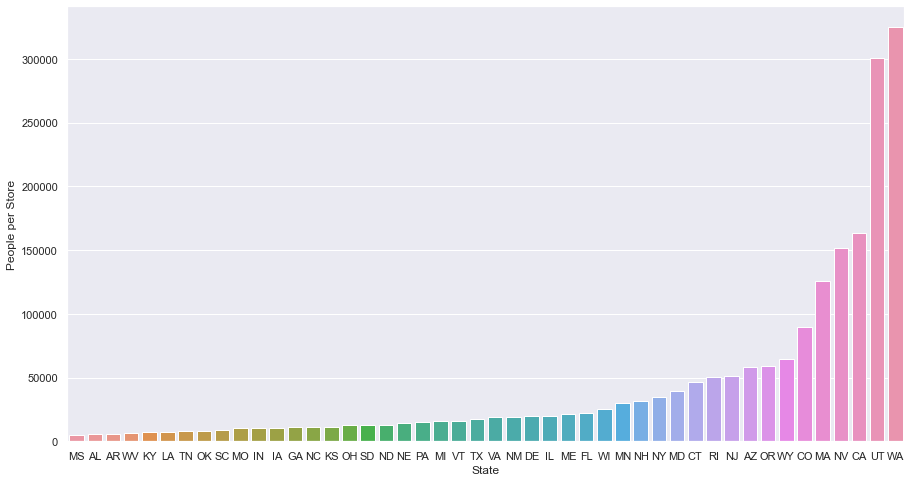

In [226]:
import seaborn as sns
sns.set_theme(style='whitegrid', palette="cubehelix")
sns.cubehelix_palette(start=.5, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='State', y='People per Store', data = DG2)

The above graph provides some very interesting insight. Firstly, it is important to note that the smaller the bar / lower the "People per Store" number the more stores Dollar General has per person in that state. So essentially Mississipi has the most Dollar General stores per capita and Washington has the least. Broadly speaking, it seems that some of the most rural and poorest states have the most Dollar General stores while some of the wealthiest ststes have the least Dollar General stores. The 5 states with the least amount of people per Dollar General store ( most stores per capita) are Mississippi, Alabama, Arkansas, West Virginia, and Kentucky. The 5 states with the most amount of people per Dollar General stores (least stores per capita) are Washington, Utah, California, Nevada, Massachusetts, and Colorado. 

Other than income, geographical location also stands out. The 5 states with most stores per capita are all in the South (West Virginia is borderline) while the 5 states with least stores per capita are all in the West or the Northeast. As mentioned before the Dollar General brand is most prevalant in the South and Midwest while the Northeast and West coast are still not saturated with Dollar General stores. 

**American Community Survey Data**

Now that we have taken a look at the state distribution of Dollar General stores and the stores per capita, we need to work with county level data.

In [227]:
ACS = pd.read_csv(r'C:\Users\aalok\Downloads\acs2017_county_data.csv')

In [228]:
ACS.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [229]:
ACS.shape

(3220, 37)

The number of rows in this dataframe makes sense - 3220 is roughly the amount of counties, parishes, and unincorporated census areas in the US (including DC and PR) as of 2017. 

In [230]:
ACS.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [231]:
ACS[['Income', 'IncomeErr']]

,Income,IncomeErr
0,55317,2838
1,52562,1348
2,33368,2551
3,43404,3431
4,47412,2630
...,...,...
3215,18900,1219
3216,16261,2414
3217,19893,1935
3218,15586,1467


In [232]:
ACS[['IncomePerCap', 'IncomePerCapErr']]

,IncomePerCap,IncomePerCapErr
0,27824,2024
1,29364,735
2,17561,798
3,20911,1889
4,22021,850
...,...,...
3215,10197,576
3216,11136,1459
3217,10449,1619
3218,8672,702


In [233]:
ACS[['Poverty', 'ChildPoverty']]

,Poverty,ChildPoverty
0,13.7,20.1
1,11.8,16.1
2,27.2,44.9
3,15.2,26.6
4,15.6,25.4
...,...,...
3215,43.8,49.4
3216,36.8,68.2
3217,50.0,67.9
3218,52.4,62.1


Taking a look at the columns it looks like all of them are relevant in describing the socioeconomic status as well as demographic status of each county. It seems like all of the data in the column to the right of "County" are all numerical data. It also seems like many of them are percentages. The race/ethnicity columns- 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific' are all percentages that (theoretically) add up to 100%. This is the same situation for the employment type columns - 'Professional', 'Service', 'Office', 'Construction','Production'- the transportation type columns - 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp','WorkAtHome' - and the employment status columns - 'PrivateWork', 'PublicWork','SelfEmployed', 'FamilyWork', 'Unemployment'. The 'Employed','MeanCommute', 'Income', 'IncomeErr', 'TotalPop', 'Men', 'Women' columns are nominal variables. Finally the 'Poverty' and 'ChildPoverty' columns are percentages as well - however they do not total 100% together.

In [181]:
#ACS['County'] = ACS['County'].str.strip('County')

In [234]:
ACS.head(50)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
5,1011,Alabama,Bullock County,10478,5616,4862,0.3,21.6,75.6,1.0,...,6.2,1.7,3.0,29.8,4290,81.4,13.6,5.0,0.0,12.1
6,1013,Alabama,Butler County,20126,9416,10710,0.3,52.2,44.7,0.1,...,0.9,0.9,2.0,23.2,7727,79.1,15.3,5.3,0.3,7.6
7,1015,Alabama,Calhoun County,115527,55593,59934,3.6,72.7,20.4,0.2,...,1.3,1.1,3.2,24.8,47392,74.9,19.9,5.1,0.1,10.1
8,1017,Alabama,Chambers County,33895,16320,17575,2.2,56.2,39.3,0.3,...,0.6,0.5,2.0,23.6,14527,84.5,11.8,3.7,0.0,6.4
9,1019,Alabama,Cherokee County,25855,12862,12993,1.6,91.8,5.0,0.5,...,0.3,0.3,2.0,26.5,9879,74.8,17.1,8.1,0.0,5.3


In [183]:
DG_AL = DG.loc[DG['State'] == 'AL']

In [184]:
DG_AL.head()

,Store No.,Name,Latitude,Longitude,Address,Street,City,State,Zip_Code,County,Phone,Country,Direction URL,Stores in State,Population in State,Stores per Person,People per Store
16147,6134,Dollar General # 6134,34.859700,-85.611924,"30357 Al Hwy 71, Bryant, AL, 35958",30357 Al Hwy 71,Bryant,AL,35958,Jackson,256-495-8522,USA,https://www.google.com/maps/dir/Current+Locati...,860,4934193,0.000174,5737.433721
16148,16427,Dollar General # 16427,34.465439,-87.058760,"6996 Danville Road, Hartselle, AL, 35640",6996 Danville Road,Hartselle,AL,35640,Morgan,256-502-5114,USA,https://www.google.com/maps/dir/Current+Locati...,860,4934193,0.000174,5737.433721
16149,1957,Dollar General # 1957,34.583772,-86.979603,"1502b 6th Ave Se, Decatur, AL, 35601",1502b 6th Ave Se,Decatur,AL,35601,Morgan,256-445-6845,USA,https://www.google.com/maps/dir/Current+Locati...,860,4934193,0.000174,5737.433721
16150,10017,Dollar General # 10017,34.590000,-87.030300,"2400 Old Moulton Rd Sw, Decatur, AL, 35603",2400 Old Moulton Rd Sw,Decatur,AL,35603,Morgan,256-580-6583,USA,https://www.google.com/maps/dir/Current+Locati...,860,4934193,0.000174,5737.433721
16151,21125,Dollar General # 21125,34.561700,-87.072000,"3621 Modaus Rd Sw, Decatur, AL, 35603",3621 Modaus Rd Sw,Decatur,AL,35603,Morgan,256-432-7030,USA,https://www.google.com/maps/dir/Current+Locati...,860,4934193,0.000174,5737.433721


The word County has been removed from the County column to match the counties as they are listed in the DG dataframe. Louisiana since it has parishes has counties listed as "XYZ parish" - we need to confirm the ACS dataframe lists it similarly. 

In [185]:
ACS_LA = ACS.loc[ACS['State'] == 'Louisiana']

In [186]:
ACS_LA.head(50)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,DG in County
1113,22001,Louisiana,Acadia Parish,62607,30433,32174,2.4,77.5,17.6,0.1,...,2.2,2.5,27.6,24982,80.0,12.1,7.6,0.3,8.9,No
1114,22003,Louisiana,Allen Parish,25667,14542,11125,4.9,71.1,19.0,1.8,...,2.2,2.3,28.3,8577,72.8,23.8,3.2,0.2,9.4,No
1115,22005,Louisiana,Ascension Parish,119129,58718,60411,5.3,69.4,21.8,0.0,...,1.0,3.6,30.0,57496,80.7,14.1,5.2,0.1,6.3,No
1116,22007,Louisiana,Assumption Parish,22881,11085,11796,2.8,65.8,29.7,0.6,...,1.8,1.5,29.6,9375,81.4,13.9,4.1,0.7,6.9,No
1117,22009,Louisiana,Avoyelles Parish,41095,20693,20402,1.8,65.3,30.1,1.2,...,2.0,1.6,30.2,14753,75.3,19.7,4.9,0.1,7.7,No
1118,22011,Louisiana,Beauregard Parish,36598,18631,17967,3.7,80.0,12.7,0.6,...,3.6,1.6,30.1,14174,76.5,18.2,5.2,0.1,7.4,No
1119,22013,Louisiana,Bienville Parish,13806,6692,7114,1.7,54.3,41.5,0.1,...,0.8,2.8,32.6,5020,68.9,23.4,6.8,0.9,7.4,No
1120,22015,Louisiana,Bossier Parish,125698,62214,63484,6.5,67.6,21.6,0.5,...,1.4,3.0,21.7,54751,76.0,18.8,5.0,0.1,5.8,No
1121,22017,Louisiana,addo Parish,251069,119235,131834,2.8,45.6,48.3,0.4,...,1.0,2.4,20.9,105583,81.2,14.1,4.6,0.1,7.0,No
1122,22019,Louisiana,alcasieu Parish,198753,96906,101847,3.2,68.2,24.6,0.3,...,1.8,2.1,20.5,90318,80.9,14.0,5.0,0.1,6.6,No


In [187]:
DG.head()

,Store No.,Name,Latitude,Longitude,Address,Street,City,State,Zip_Code,County,Phone,Country,Direction URL,Stores in State,Population in State,Stores per Person,People per Store
0,4405,Dollar General # 4405,30.193502,-93.218094,"3521 Ryan St, Lake Charles, LA, 70605",3521 Ryan St,Lake Charles,LA,70605,Calcasieu Parish,337-377-0289,USA,https://www.google.com/maps/dir/Current+Locati...,623,4627002,0.000135,7426.969502
1,20909,Dollar General # 20909,31.526540,-92.407550,"7933 Ridge St, Pollock, LA, 71467",7933 Ridge St,Pollock,LA,71467,Grant Parish,318-545-4780,USA,https://www.google.com/maps/dir/Current+Locati...,623,4627002,0.000135,7426.969502
2,11950,Dollar General # 11950,34.919377,-83.386249,"7 Page St, Clayton, GA, 30525",7 Page St,Clayton,GA,30525,Rabun,470-508-9149,USA,https://www.google.com/maps/dir/Current+Locati...,993,10830007,0.000092,10906.351460
3,6115,Dollar General # 6115,33.496183,-82.137341,"210 S Belair Rd, Augusta, GA, 30907",210 S Belair Rd,Augusta,GA,30907,Columbia,706-619-1530,USA,https://www.google.com/maps/dir/Current+Locati...,993,10830007,0.000092,10906.351460
4,10145,Dollar General # 10145,33.717249,-84.147343,"6633 Covington Hwy, Lithonia, GA, 30058",6633 Covington Hwy,Lithonia,GA,30058,DeKalb,470-508-8261,USA,https://www.google.com/maps/dir/Current+Locati...,993,10830007,0.000092,10906.351460


We do not need to remove the "Parish" part of the county names for Louisiana.